In [1]:
import VASPPlotter
import VASPInputHandler
import numpy as np
import os
import subprocess

In [ ]:
# DOS Plot for Full Na to Full Mg.
a = VASPPlotter.Plotter("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/CrTiO4")
a.dos(what_to_plot={'Cr' : {'spins' : ['summed'], 'orbitals' : ['all']}, 'Ti' :
                    
                    {'spins' : ['summed'], 'orbitals' : ['all']}, 'O' : {'spins' : ['summed'], 'orbitals' : ['all']}},
      colors_and_labels = {'Cr-summed-all' : {'color' : 'black', 'label' : 'Cr'}, 'Ti-summed-all' : {'color' : 'blue', 'label' : 'Ti'}, 'O-summed-all' : {'color' : 'red', 'label' : 'O'}},
      xticks=(True, np.arange(0, 0.100, 0.05)), yticks=(True, np.arange(-3, 3.01, 1)), doscar="DOSCAR", xlim=(0, 0.1), ylim=(-3, 3), smearing = 0.1, show = True, spgp='pnma')

In [ ]:
a = VASPPlotter.Plotter("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/")
a.avplotter('fd3m', 'Mg', 'Na', calstructure = {'Co0.5Sn1.5O4': {'color': 'royalblue'}, 'CrSnO4': {'color': 'darkorange'}, 'CrTiO4': {'color': 'forestgreen'}, 
                                 'Fe0.5Ti1.5O4': {'color': 'dimgray'}, 'MnSnO4': {'color': 'firebrick'}, 'Ni0.5Sn1.5O4': {'color': 'darkorchid'}})

In [154]:
# Designate new calculation folder and take desire structure from MP database. Change supercell as you want.
# Use NaMn2O4 for pnma basic structure, MgAl2O4 for fd3m basic structure
a = VASPInputHandler.VASPSetUp("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnZrO4/MnZrO4_fd3m_first")
a.structure_from_mp("MgAl2O4", "Fd-3m", True)
a.make_supercell([2,2,1])

'/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnZrO4/MnZrO4_fd3m_first/POSCAR'

In [32]:
# Designate new calculation folder with MP ID and get desired structure from MP database.
a = VASPInputHandler.VASPSetUp("/global/cscratch1/sd/yychoi/JCESR/MgSCN/test/mp-1223509_first")
a.structure_from_id()
a.els_to_amts()

{'K': 2, 'C': 2, 'S': 2, 'N': 2}

In [155]:
# Change atoms as you want and find most electrostatically stable structure.
a.change_atoms({'Mg' : 'Na+', 'Al' : {'Mn3+' : 0.5, 'Zr4+' : 0.5}, 'O' : 'O2-'}, 100)

'/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnZrO4/MnZrO4_fd3m_first/POSCAR'

In [156]:
# Change atoms one more time. Doing this twice is assuming rapid ion exchage in the process. And perturb poscar
a.change_atoms({'Na' : 'remove', 'Mn' : 'Mn3+', 'Zr' : 'Zr4+', 'O' : 'O2-'}, 100)
a.perturb_poscar(0.01)

Something is wrong


'/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnZrO4/MnZrO4_fd3m_first/POSCAR'

In [157]:
# Generate Kpoint density with 1000/atom, INCAR, POTCAR, script
a.kpoints(1000)
a.incar(geometry_opt=True, dos=True, MP=True, write_file=True)
a.potcar(MP=True, machine='cori')
a.copy_script(time='12:00:00')

In [35]:
a = VASPInputHandler.VASPBasicAnalysis('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnZrO4/MgMnZrO4_pnma_first')
a.second_run()

In [7]:
b = VASPInputHandler.VASPBasicAnalysis('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/MnTiO4_pnma_second/')
b.ehullmp()

0.057252898333333135

In [5]:
import re
i = '/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/MnTiO4_pnma_second'
re.findall('[A-Z][^A-Z]*', i.split('/')[-1].split('_')[0])[0]

'Mn'

In [5]:
b = VASPPlotter.Plotter('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/')

In [ ]:
b.ehullplotter('pnma', ionlist = ['Na', 'Mg'])

In [ ]:
# For generating Secondrun file under MgPostSpinels dictionary
caldir = []
structurelist = [x[0] for x in os.walk('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels')]
for path in structurelist:
    if path.split('/')[-2] == 'MgPostSpinels' and path.split('/')[-1][-1] == '4':
        caldir.append(path)
        
pathlist = []
for dirs in caldir:
    structurelist = [x[0] for x in os.walk(dirs)]
    for path in structurelist:
        if path.split('/')[-1].split('_')[-1] == 'first' and path.split('/')[-1].split('_')[-2] == 'fd3m':
            a = VASPInputHandler.VASPBasicAnalysis(path)
            a.second_run()
            print(path)
        elif path.split('/')[-1].split('_')[-1] == 'second' and path.split('/')[-1].split('_')[-2] == 'fd3m':
            pathlist.append(path)

In [ ]:
# For submit Secondrun script under MgPostSpinels dictionary
for i, j in enumerate(pathlist):
    # subprocess.call(["ls -alt"], shell=True, cwd=j)
    subprocess.call(["sbatch script"], shell=True, cwd=j)  # for python 2
    print(j)
    print(str(i) + "th job is launched")

In [ ]:
# For find specific file under MgPostSpinels - specific structure dictionary
caldir = []
pathlist = []
structurelist = [x[0] for x in os.walk('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/Ni0.5Zr1.5O4')]
for path in structurelist:
    if path.split('/')[-1].split('_')[-1] == 'second':
        pathlist.append(path)
        
print(pathlist)
print(len(pathlist))

In [ ]:
# For generating Secondrun file under MgPostSpinels - specific structure dictionary
for i, j in enumerate(pathlist):
    a = VASPInputHandler.VASPBasicAnalysis(j)  # for python 2
    a.second_run()
    print(j)

In [ ]:
# For submit Secondrun file under MgPostSpinels - specific structure dictionary
for i, j in enumerate(pathlist):
    # subprocess.call(["ls -alt"], shell=True, cwd=j)
    subprocess.call(["sbatch script"], shell=True, cwd=j)  # for python 2
    print(j)
    print(str(i) + "th job is launched")

In [ ]:
caldir = []
pathlist = []
structurelist = [x[0] for x in os.walk('/global/cscratch1/sd/yychoi/JCESR/MgSCN/')]
for path in structurelist:
    if path.split('_')[-1] == 'second':
        pathlist.append(path)
print(pathlist)

In [15]:
mpr.get_data('mp-27814')[0]['energy_per_atom'] - mpr.get_data('mp-568286')[0]['energy_per_atom']*1/15 - (mpr.get_data('mp-96')[0]['energy_per_atom']) * 14/15

0.06395212362499914

In [2]:
a = VASPInputHandler.LOBSTERAnalysis('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnSnO4/MnSnO4_pnma_second')

In [3]:
data = a.pair_dict()

In [4]:
data2 = a.detailed_dos_dict()

In [9]:
data3 = a.energies_to_populations(element_pair='O_O')

In [ ]:
data3

In [2]:
a = VASPPlotter.Plotter('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnSnO4/MnSnO4_pnma_second')

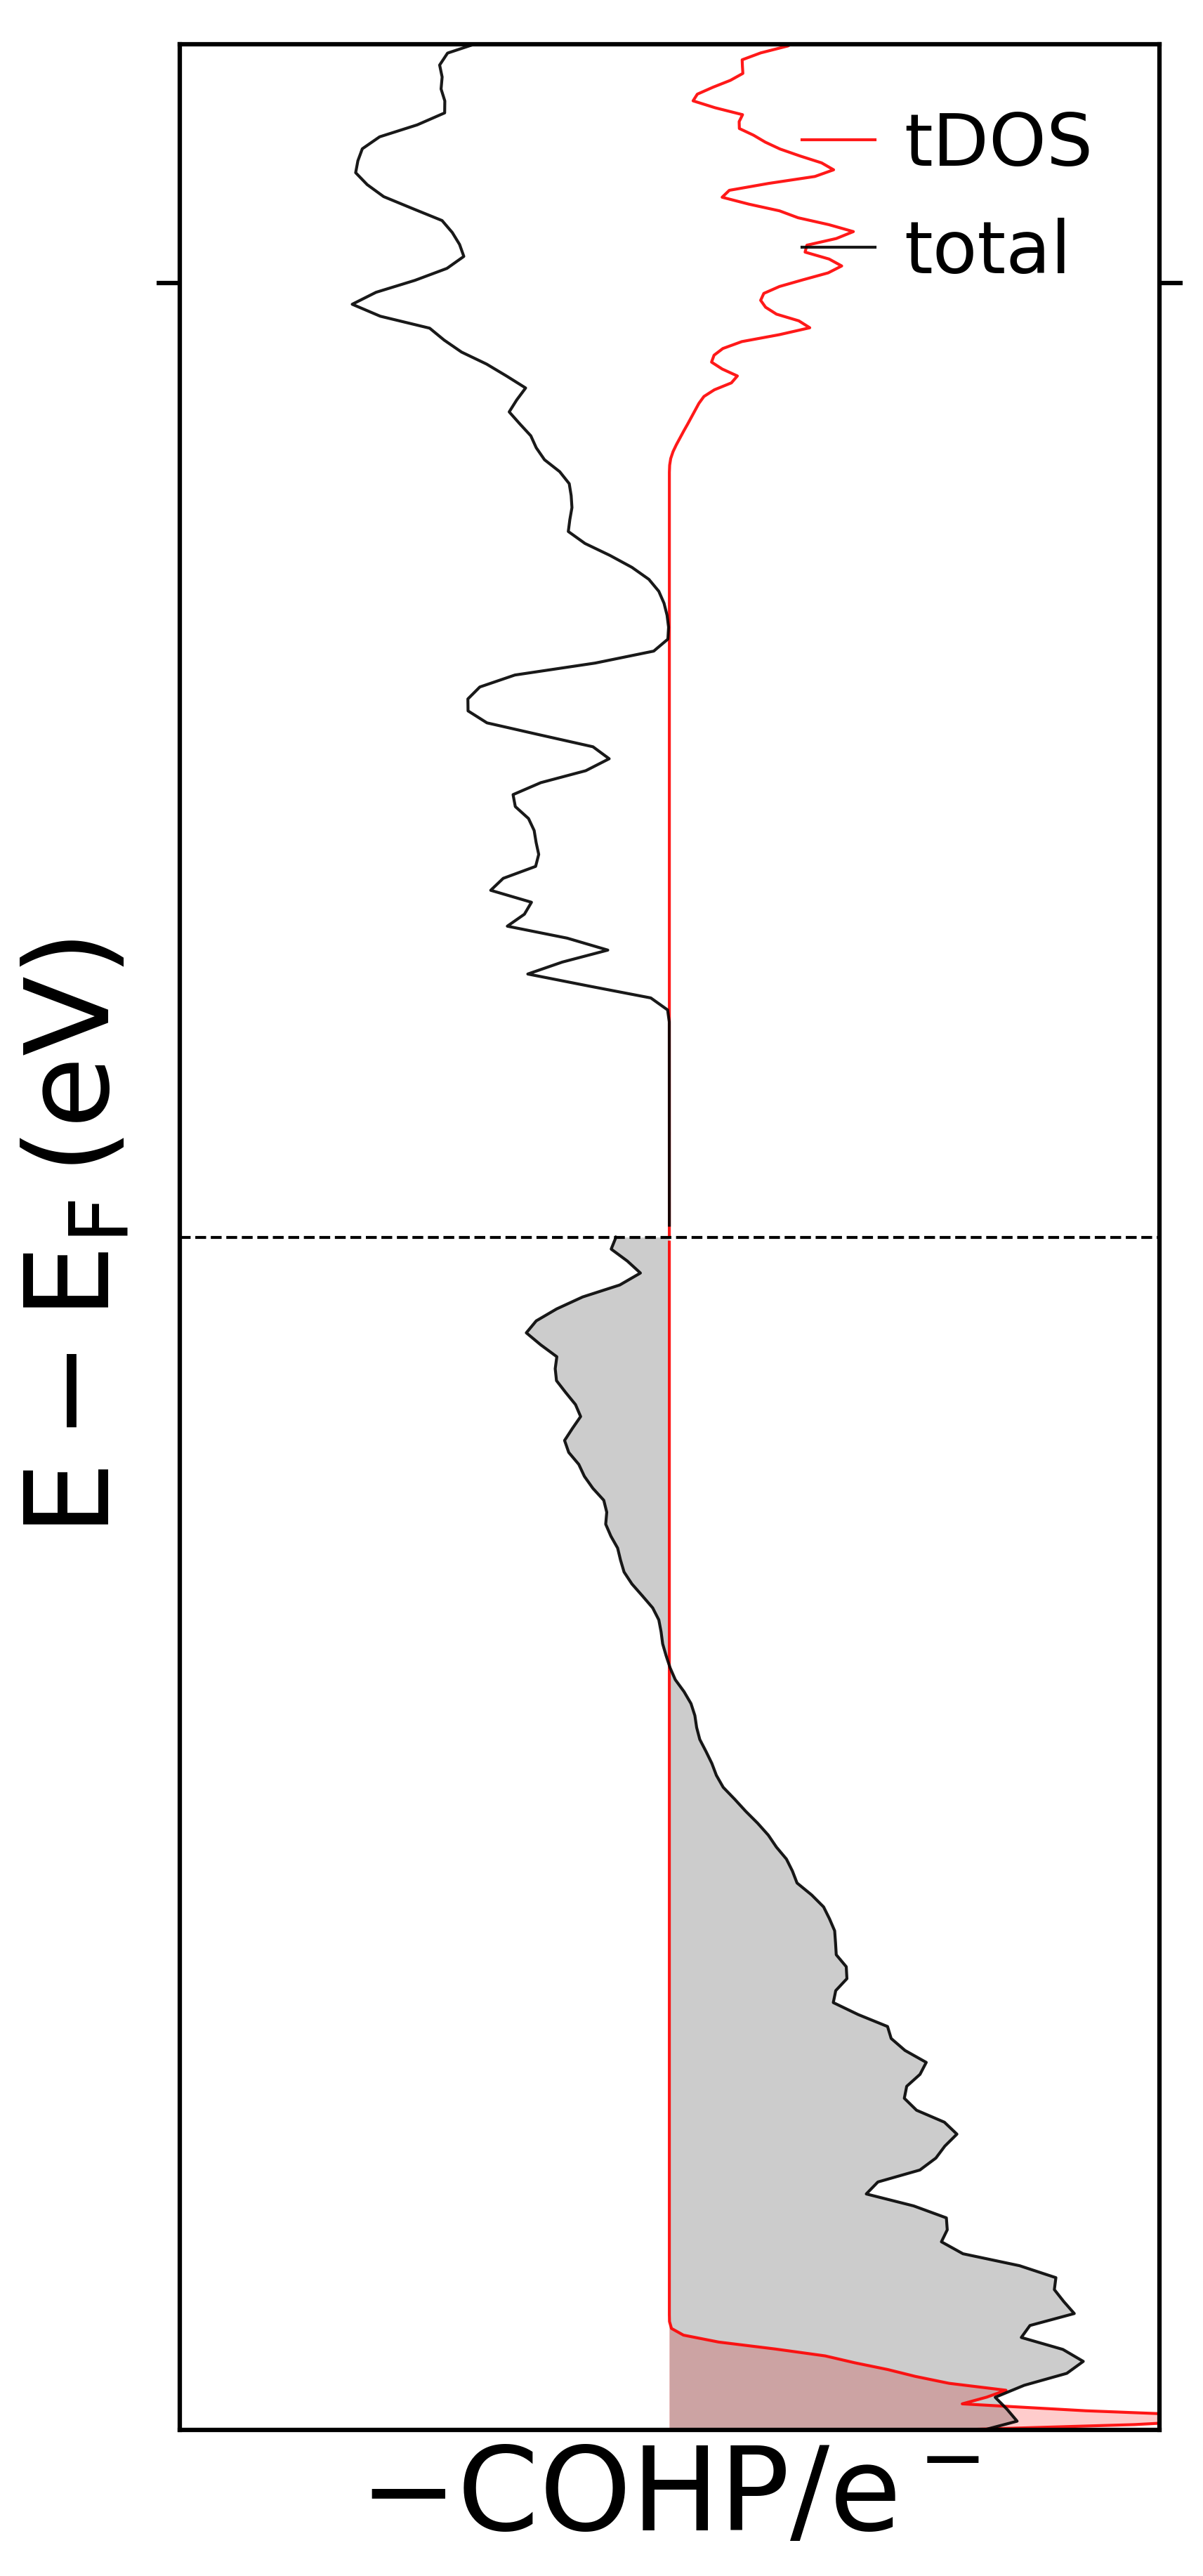

In [3]:
a.cohp(xlim = [-0.1,0.1], ylim = [-5, 5], tdos = 'DOSCAR')